In [180]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [182]:
# preprocessing and segmentation
drive.mount('/gdrive')
img = cv2.imread('/content/handwritten2.jpg')
img.shape

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


(550, 800, 3)

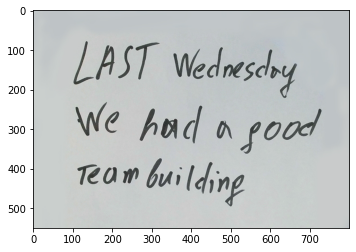

In [82]:
# img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
%matplotlib inline
plt.imshow(img, cmap = 'gray')

In [ ]:
# img1 = cv2.GaussianBlur(img1, (21,21),0)
# plt.imshow(img1)

In [110]:
 def binarize(img,filter_size = 1):
    """
    Binarizes an image (Gaussian blur followd by Otsu's algorithm)
    and might flip the color, such that it is predominantely black.
    img : 3d-array(int)
        numpy array holding the image (3 channel RBG)
    filter_size : int, optional
        size of the Gaussian filter
    returns : 2d-array(int)
        binarized image. Pixel Values are either 0 or 255
    """
    img = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)
    img = cv2.GaussianBlur(img,(filter_size,filter_size),0)
    _,img = cv2.threshold(img,0,255,cv2.THRESH_OTSU | cv2.THRESH_BINARY )

    # if the image is predominately white, flip the color
    whitefrac = np.sum(img)/(255*img.shape[0]*img.shape[0])
    if whitefrac > .5:
        img = 255 - img
    return img

(550, 800)

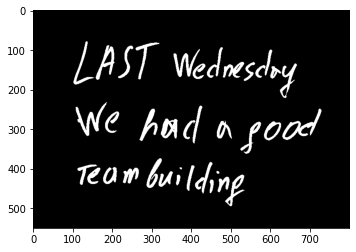

In [111]:
# img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
img1 =binarize(img, 1)
# img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
plt.imshow(img1, cmap='gray')
img1.shape

In [112]:
def pad2square(img,l_target,padding=0):
    """
    Zero-pad a rectangular image so that it becomes square shaped
    and then rescales it to a desired target size l_target.
    myimg : 2d-array(int)
        numpy array holding the image
    l_target : int
        desired target size in number of pixels
    padding : int, optional
        extra zero padding. It is ensured, that the final image has
        at least "padding" zero padding pixels around whatever "img" has been rescaled to.
    """
    h,w = img.shape
    lmax = np.max(img.shape)
    #rescaling factor
    fresc = (l_target - 2*padding)/lmax

    #zero pad shorter side to obtain a square image
    if h > w:
        img_pad = cv2.copyMakeBorder(img,0,0,(h-w)//2,h-w - (h-w)//2,cv2.BORDER_CONSTANT)
    else:
        img_pad = cv2.copyMakeBorder(img,(w-h)//2,w-h - (w-h)//2,0,0,cv2.BORDER_CONSTANT)

    # add padding to all sides
    if padding > 0:
        p_resc = int(np.round(lmax*padding/(l_target-2*padding)))
        img_pad = cv2.copyMakeBorder(img_pad,p_resc,p_resc,p_resc,p_resc,cv2.BORDER_CONSTANT)

    #rescale to target size
    img_pad = cv2.resize(img_pad,(l_target,l_target))
    return img_pad

In [113]:
# img1 = pad2square(img1, 256)

In [114]:
# plt.imshow(img1, 'gray')

In [139]:
def segment_characters(myimg,minsize=200,l_target = 28,padding=2):
    """
    Pipeline for detecting single-contour characters in a binarized image:
    Returns a list of padded and rescaled single-character subimages
    as well as their corresponding bounding boxes.
    myimg : 2d-array(int)
        numpy array holding the binarized image
    minsize = int, optional
        minimum number of pixels of a detected bounding box.
        Discarded if smaller
    l_target : int
        target size of the extracted subimages
    padding : int, optional
        padding added to the extracted character images, see pad2square
    returns: list of (tuple,2d-array(int))
        (bounding bbox, character image)
    """
    #find contours
    contours,_ = cv2.findContours(myimg.copy(), cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)

    segments = []

    for c in contours:
        bbox = cv2.boundingRect(c)
        if bbox[2]*bbox[3] >= minsize:
            subimg = myimg[bbox[1]:bbox[1]+bbox[3],bbox[0]:bbox[0]+bbox[2]]
            subimg = pad2square(subimg,l_target=28,padding=padding)
            segments.append((bbox,subimg))

    return segments


In [147]:
seg_list=segment_characters(binarize(img,7),350, 28)

first bounding box: (466, 421, 30, 39)
shape of first image: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

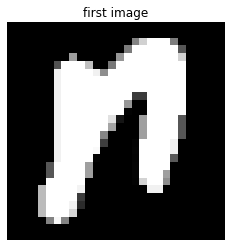

In [177]:
index = np.random.randint(30)
# index=0
# print(len(seg_list))
firstbbx, first_img = seg_list[index]
print(f'first bounding box: {firstbbx}\nshape of first image: {first_img.shape}')
plt.imshow(first_img, cmap='gray')
plt.title('first image')
plt.axis('off')


In [178]:



def detectanddrawbb(img):
    img = img.copy()
    for bbox,subimg in segment_characters(binarize(img, 7)):
        img = cv2.rectangle(img, bbox,(255,0,0), 3)
    return img

In [145]:
resulted_img=detectanddrawbb(img)

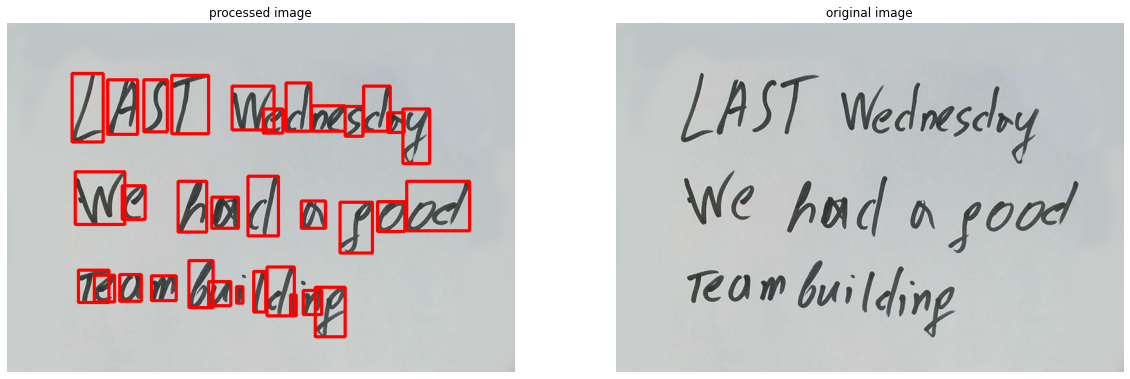

In [146]:
#some visualization
plt.figure(figsize =(20,10))
plt.subplot(1,2,1)
plt.imshow(resulted_img, cmap = 'gray')
plt.title('processed image')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img, cmap = 'gray')
plt.title('original image')
plt.axis('off')
plt.show()

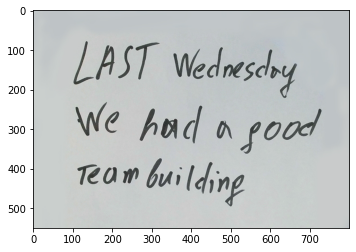

In [179]:
plt.imshow(img, cmap='gray')